## **Session 05 / 23-Oct-2025**

### ***Importing the libraries needed in today's program and exercise. `Numpy`, `Pandas`, `Scikit-Learn`, `Matplotlib`, `arabic-reshaper`, `bidi` and `mpl_toolkits`.***

In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### ***"Multiple Linear Regression & Visualization (SciKit-Learn & Matplotlib)"***

### ***In the code below, we introduce and define Multiple Linear Regression (MLR). In MLR, we have at least two input features (predictors) and only one output (target). Then, we train the model using the provided data with the `.fit()` method.***

In [24]:
x = np.array([[45, 1], [55, 1], [60, 2], [65, 2], [70, 2], [75, 2], [80, 3], [90, 3], [100, 4]])
y = np.array([2.5, 3, 4, 4.5, 5, 5.5, 6, 7, 8])
model = LinearRegression()
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### ***In the code below, we obtain the y-intercept using the `.intercept_` method and the slopes (coefficients) using the `.coef_` method.***

In [25]:
intercept = model.intercept_
coef = model.coef_
b1 = coef[0]
b2 = coef[1]
print(f"width_from_origin: {intercept:.3f} \nb1: {b1:.3f} \nb2: {b2:.3f}")

width_from_origin: -1.900 
b1: 0.090 
b2: 0.250


### ***In the code below, we predict new output values by supplying new data to the model we have trained.***

In [26]:
x_new = np.array([[50, 1], [95, 3], [85, 3]])
y_pred = model.predict(x_new)

### ***To plot the trained model, we can proceed in both 2D and 3D, as the model involves three variables (two input features and one output). In the code below, for the 2D plot, we hold one of the variables constant by using its mean value, and then prepare the remaining necessary variables for plotting.***

In [27]:
area_range = np.linspace(40, 100, 3)
avg_rooms = np.full_like(area_range, 2)
x_line = np.column_stack((area_range, avg_rooms))
y_line = model.predict(x_line)

### ***In the code below, we use the Matplotlib library to draw the 2D plot of the problem model.***

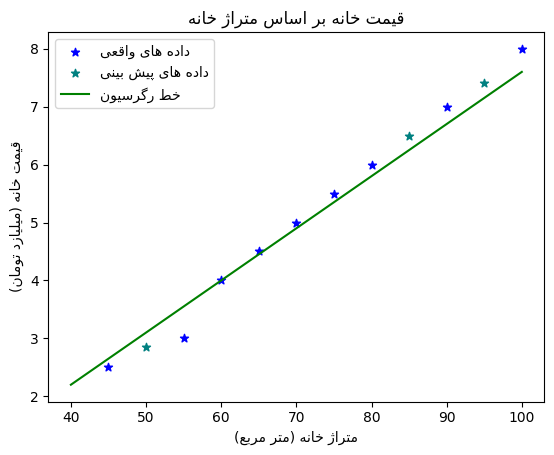

In [28]:
plt.title(get_display(arabic_reshaper.reshape("قیمت خانه بر اساس متراژ خانه")))
plt.xlabel(get_display(arabic_reshaper.reshape("متراژ خانه (متر مربع)")))
plt.ylabel(get_display(arabic_reshaper.reshape("قیمت خانه (میلیازد تومان)")))
plt.scatter(x[:,0], y, marker="*", color="blue", label=get_display(arabic_reshaper.reshape("داده های واقعی")))
plt.scatter(x_new[:,0], y_pred, marker="*", color="teal", label=get_display(arabic_reshaper.reshape("داده های پیش بینی")))
plt.plot(area_range, y_line, color="green", label=get_display(arabic_reshaper.reshape("خط رگرسیون")))
plt.legend()
plt.show()

### ***Next, to draw the model's 3D plot, we follow the steps below.***

### ***We obtain the minimum and maximum values for the X1​ and X2​ variables.***

In [29]:
x1_min, x1_max = x[:,0].min(), x[:,0].max()
x2_min, x2_max = x[:,1].min(), x[:,1].max()

### ***We generate the range of X1​ and X2​ values using the `np.linspace()` method.***

In [30]:
x1_range = np.linspace(x1_min-10, x1_max+10)
x2_range = np.linspace(x2_min-5, x2_max+5)

### ***We create a grid (or matrix) of values obtained in the previous step using the `np.meshgrid()` method.***

In [31]:
x1_s, x2_s = np.meshgrid(x1_range, x2_range)

### ***In the code below, we check and prepare the values for plotting the graph.***

In [32]:
x_s_c = np.column_stack((x1_s.ravel(), x2_s.ravel()))
y_s = model.predict(x_s_c).reshape(x1_s.shape)

### ***We draw the 3D plot of the model using `Axes3D`, which we imported into the program.***

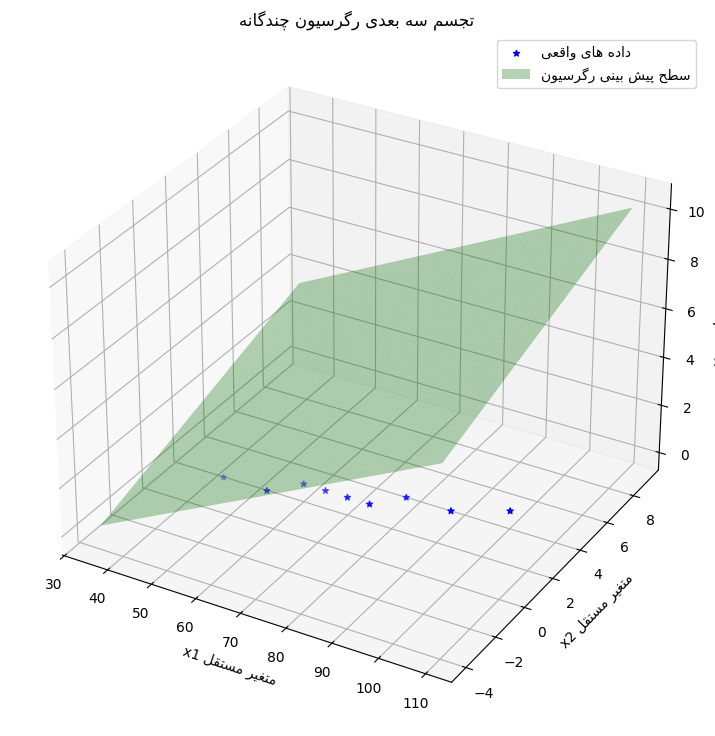

In [33]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection="3d")
ax.set_title(get_display(arabic_reshaper.reshape("تجسم سه بعدی رگرسیون چندگانه")))
ax.set_xlabel(get_display(arabic_reshaper.reshape("متغیر مستقل x1")))
ax.set_ylabel(get_display(arabic_reshaper.reshape("متغیر مستقل x2")))
ax.set_zlabel(get_display(arabic_reshaper.reshape("متغیر وابسته y")))
ax.scatter(x[:,0], x[:,1], marker="*", color="blue", label=get_display(arabic_reshaper.reshape("داده های واقعی")))
ax.plot_surface(x1_s, x2_s, y_s, color="green", label=get_display(arabic_reshaper.reshape("سطح پیش بینی رگرسیون")), alpha=0.3)
ax.legend()
plt.show()

### ***"Model Evaluation & Data Splitting (SciKit-Learn)"***

### ***With the code below, we split the data into training and testing sets for model training.***

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### ***We train the model using the data we have split.***

In [35]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### ***We predict new outputs using the test data we split.***

In [36]:
y_pred = model.predict(x_test)

### ***To evaluate the model's accuracy and error in linear regression, we use evaluation metrics including MSE (Mean Squared Error), RMSE (Root Mean Squared Error), and R2 (Coefficient of Determination). We import the relevant methods before using the Scikit-learn library.***

In [37]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"mse: {mse:.3f} \trmse: {rmse:.3f} \tr2: {r2:.3f}")

mse: 0.083 	rmse: 0.289 	r2: 0.969


### ***"Homework"***

### ***Exercise: Multiple Linear Regression: Predicting a student's final grade. / Goal: Predict the student's final grade in a specific course. / Feature 1: Weekly study hours. / Feature 2: Class exam scores. / Feature 3: Number of absences. / Including a 3D plot.***

In [38]:
features = np.array([[2, 8, 3], [3, 13, 2], [4, 15, 2], [5, 19, 1], [6, 19, 2], [3, 14, 3], [5, 18, 2], [7, 20, 2]])
grade = np.array([7, 12, 15, 19, 18, 13, 17, 19])
x = features
y = grade
features_train, features_test, grade_train, grade_test = train_test_split(features, grade, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(features_train, grade_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
features3_mean = x[:, 2].mean()
features1_min, features1_max = features[:,0].min(), features[:,0].max()
features2_min, features2_max = features[:,1].min(), features[:,1].max()
features1_range = np.linspace(features1_min, features1_max, 50)
features2_range = np.linspace(features2_min, features2_max, 50)
features1_grid, features2_grid = np.meshgrid(features1_range, features2_range)
features3_constant = np.full(features1_grid.shape, features3_mean)
features_s_c = np.column_stack((features1_grid.ravel(), features2_grid.ravel(), features3_constant.ravel()))
grade_plot_pred = model.predict(features_s_c).reshape(features1_grid.shape)

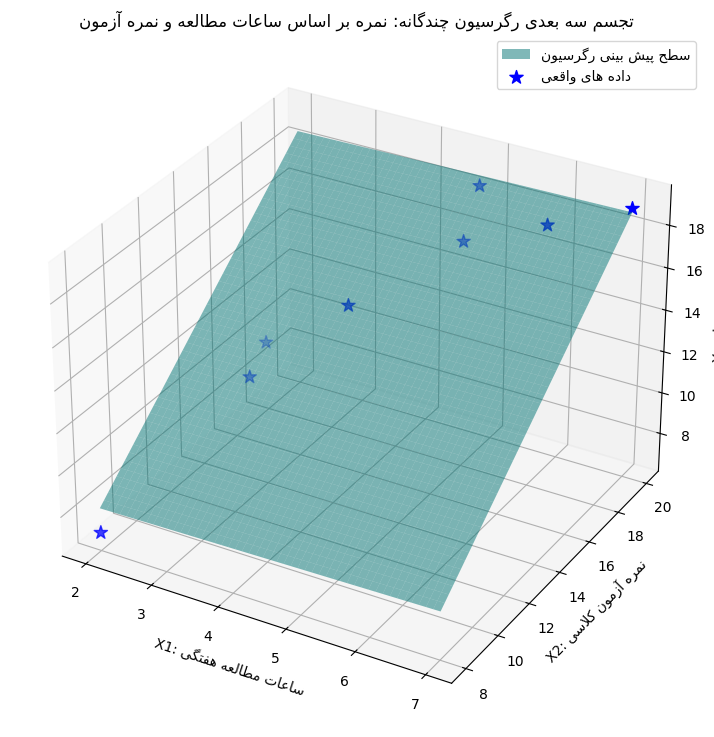

In [40]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(features1_grid, features2_grid, grade_plot_pred, color="teal", alpha=0.5, label=get_display(arabic_reshaper.reshape("سطح پیش بینی رگرسیون")))
ax.scatter(x[:, 0], x[:, 1], y, marker="*", color="blue", s=100, label=get_display(arabic_reshaper.reshape("داده های واقعی")))
ax.set_title(get_display(arabic_reshaper.reshape("تجسم سه بعدی رگرسیون چندگانه: نمره بر اساس ساعات مطالعه و نمره آزمون")))
ax.set_xlabel(get_display(arabic_reshaper.reshape("X1: ساعات مطالعه هفتگی")))
ax.set_ylabel(get_display(arabic_reshaper.reshape("X2: نمره آزمون کلاسی")))
ax.set_zlabel(get_display(arabic_reshaper.reshape("Y: نمره نهایی")))
ax.legend()
plt.show()

In [41]:
intercept = model.intercept_
coef = model.coef_
b1 = coef[0]
b2 = coef[1]
b3 = coef[2]
print(f"width_from_origin: {intercept:.3f} \nb1: {b1:.3f} \nb2: {b2:.3f} \nb3: {b3:.3f}")

width_from_origin: 3.627 
b1: 0.049 
b2: 0.866 
b3: -1.162


In [42]:
grade_pred_test = model.predict(features_test)
mse = mean_squared_error(grade_test, grade_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(grade_test, grade_pred_test)
print(f"mse: {mse:.3f} \nrmse: {rmse:.3f} \nr2: {r2:.3f}")

mse: 0.424 
rmse: 0.651 
r2: -0.695
